## Environment setup

For optimal training speed, ensure to enable the GPU of Colab!
Go to `Runtime/Change runtime type/`, then select `GPU` in `Hardware accelerator` and click on `Save`.

In [1]:
!nvidia-smi

Sat Feb  5 15:24:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Now we'll download everything we need for the training

In [2]:
# Package dependencies
!git clone https://github.com/frgfm/Holocron.git
!pip install -e Holocron/. --upgrade
!pip install wandb
# Data
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz
!tar -xvzf imagenette2-320.tgz
!rm imagenette2-320.tgz

Cloning into 'Holocron'...
remote: Enumerating objects: 16806, done.
remote: Counting objects: 100% (10098/10098), done.
remote: Compressing objects: 100% (2618/2618), done.
remote: Total 16806 (delta 7719), reused 9484 (delta 7186), pack-reused 6708
Receiving objects: 100% (16806/16806), 12.32 MiB | 14.48 MiB/s, done.
Resolving deltas: 100% (12551/12551), done.
Obtaining file:///content/Holocron
     |████████████████████████████████| 4.3 MB 4.1 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Running setup.py develop for pylocron
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Streaming output truncated to the last 5000 lines.
imagenette2-320/train/n03888257/n03888257_16077.JPEG
imagenette2-320/train/n03888257/n03888257_23339.JPEG
imagenette2-320/train/n03888257/n03888257_44204.JPEG
imagenette2-320/train/n03888257/n03888257_61633.JPEG
imagenette2-320/train/n03888257/n03888257_15067.JPEG
imagenette2-320/train/n03888257/n03888257_75365.JPEG
imagenette2-320/train/n03888257/n03888257_63966.JPEG
imagenette2-320/train/n03888257/n03888257_3927.JPEG
imagenette2-320/train/n03888257/n03888257_20684.JPEG
imagenette2-320/train/n03888257/ILSVRC2012_val_00047778.JPEG
imagenette2-320/train/n03888257/n03888257_14016.JPEG
imagenette2-320/train/n03888257/n03888257_37776.JPEG
imagenette2-320/train/n03888257/ILSVRC2012_val_00041706.JPEG
imagenette2-320/train/n03888257/n03888257_17513.JPEG
imagenette2-320/train/n03888257/n03888257_17143.JPEG
imagenette2-320/train/n03888257/n03888257_6738.JPEG
imagenette2-320/train/n03888257/n03888257_4355.JPEG
imagenette2-320/train/n03888257/ILS

Now go to `Runtime/Restart runtime` for your changes to take effect!

In [1]:
import sys
sys.path.insert(1, "/content/Holocron/references/classification")
from train import main, get_parser

If you wish to log your experiment, feel free to login with your W&B account!

In [ ]:
!wandb login

The training script has many parameters for you to experiment on, you can use the help command to inspect them!

In [2]:
!python Holocron/references/classification/train.py --help

usage: train.py [-h] [--name NAME] [--arch ARCH] [--dataset DATASET]
                [--freeze-until FREEZE_UNTIL] [--device DEVICE]
                [-b BATCH_SIZE] [--epochs EPOCHS] [-j WORKERS]
                [--img-size IMG_SIZE] [--label-smoothing LABEL_SMOOTHING]
                [--opt OPT] [--sched SCHED] [--lr LR] [--wd WEIGHT_DECAY]
                [--norm-wd NORM_WD] [--mixup-alpha MIXUP_ALPHA] [--find-lr]
                [--check-setup] [--show-samples] [--output-file OUTPUT_FILE]
                [--resume RESUME] [--test-only] [--pretrained] [--amp] [--wb]
                data_path

Holocron Classification Training

positional arguments:
  data_path             path to dataset folder

optional arguments:
  -h, --help            show this help message and exit
  --name NAME           Name of your training experiment (default: None)
  --arch ARCH           architecture to use (default: darknet19)
  --dataset DATASET     dataset to train on (default: imagenette)
  --freeze-unt

Let's check some training samples

Namespace(amp=False, arch='rexnet1_0x', batch_size=64, check_setup=False, data_path='/content/imagenette2-320/', dataset='imagenette', device=0, epochs=20, find_lr=False, freeze_until=None, img_size=224, label_smoothing=0.1, lr=0.001, mixup_alpha=0.2, name=None, norm_wd=None, opt='adam', output_file='./model.pth', pretrained=False, resume='', sched='onecycle', show_samples=True, test_only=False, wb=False, weight_decay=0, workers=2)
Training set loaded in 0.16s (9469 samples in 147 batches)


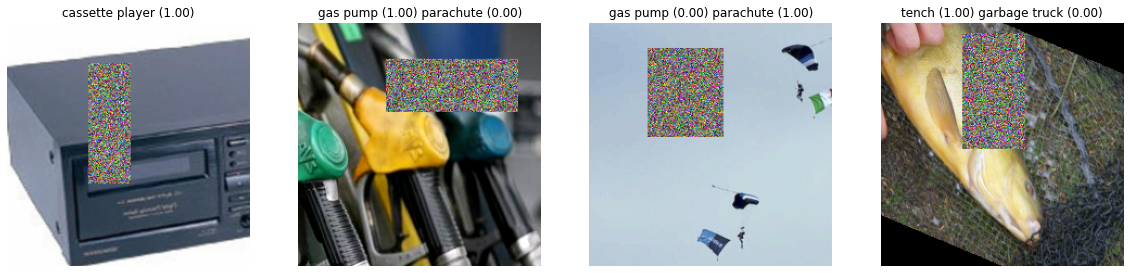

In [2]:
main(get_parser().parse_args("/content/imagenette2-320/ --arch rexnet1_0x -b 64 --device 0 --mixup-alpha 0.2 --show-samples".split()))

For now let's train with a good default setup

Namespace(amp=True, arch='rexnet1_0x', batch_size=64, check_setup=False, data_path='/content/imagenette2-320/', dataset='imagenette', device=0, epochs=20, find_lr=True, freeze_until=None, img_size=224, label_smoothing=0.1, lr=0.001, mixup_alpha=0.2, name=None, norm_wd=None, opt='adamp', output_file='./model.pth', pretrained=False, resume='', sched='onecycle', show_samples=False, test_only=False, wb=False, weight_decay=0, workers=2)
Training set loaded in 0.05s (9469 samples in 147 batches)
Looking for optimal LR


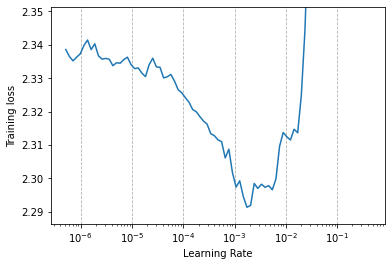

In [2]:
main(get_parser().parse_args("/content/imagenette2-320/ --arch rexnet1_0x -b 64 --opt adamp --device 0 --mixup-alpha 0.2 --amp --find-lr".split()))

In order to interpret this graph, you can refer to Sylvain Gugger's [post](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html)!
Here we'll use a learning rate of `5e-4` and run the training 🙌

In [5]:
main(get_parser().parse_args("/content/imagenette2-320/ --arch rexnet1_0x -b 64 --opt adamp --device 0 --mixup-alpha 0.2 --amp --sched onecycle --lr 5e-4 --epochs 10 --output-file ./rexnet1_0x.pt".split()))

Namespace(amp=True, arch='rexnet1_0x', batch_size=64, check_setup=False, data_path='/content/imagenette2-320/', dataset='imagenette', device=0, epochs=10, find_lr=False, freeze_until=None, img_size=224, label_smoothing=0.1, lr=0.0005, mixup_alpha=0.2, name=None, norm_wd=None, opt='adamp', output_file='./rexnet1_0x.pt', pretrained=False, resume='', sched='onecycle', show_samples=False, test_only=False, wb=False, weight_decay=0, workers=2)
Training set loaded in 0.05s (9469 samples in 147 batches)
Validation set loaded in 0.03s (3925 samples in 62 batches)
Start training


Validation loss decreased inf --> 2.09: saving state...
Validation loss decreased 2.09 --> 1.692: saving state...
Validation loss decreased 1.692 --> 1.685: saving state...
Validation loss decreased 1.685 --> 1.451: saving state...
Validation loss decreased 1.451 --> 1.292: saving state...
Validation loss decreased 1.292 --> 1.161: saving state...
Validation loss decreased 1.161 --> 1.095: saving state...
Validation loss decreased 1.095 --> 1.045: saving state...
Validation loss decreased 1.045 --> 1.014: saving state...
Validation loss decreased 1.014 --> 1.009: saving state...
Training time 0:22:32


And now enjoy your newly trained model 🚀